# Sistemas discretos

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Concepto de sistema

Un sistema puede concebirse como una colección de elementos que ejecutan una función e idealizarse como una caja negra, con entradas y salidas, tal como lo muestra la figura.
<img src="images/sistema.png">
En este caso, la entrada se denota por la variable $x$, la salida por $y$ y el sistema mediante $\mathcal{L}\{\cdot\}$.

Un sistema se puede escribir matemáticamente como:

- $\mathcal{L}\{x[n]\} = y[n]$

o bien

- $x[n] \rightarrow y[n]$


Al modelar sistemas en forma matemática, las entradas y salidas (señales) discretas son secuencias de números, mientras que los sistemas son funciones de estas secuencias, funciones compuestas, transformadas u operadores.

**Ejemplos de sistemas discretos**

- Un algoritmo computacional
- La bolsa de comercio (toma valores sólo un vez al día)
- Efecto digital de audio

Los sistemas discretos:
    - Operan sobre señales discretas
    - Ejemplo: algoritmo computacional
    - Se representan por ecuaciones de diferencias
    - Los parámetros del sistema se definen sólo en ciertos puntos de la variable independiente
        
    
**Ejemplo de un sistema híbrido**
Sistema de retraso de audio en el computador.
    
***


## Interconexión de sistemas

Los sistemas se pueden interconectar en serie (cascada) o en paralelo, tal como lo muestra la figura:


<img src="images/series-parallel.jpg">

## Propiedades de sistemas

Los sistemas discretos pueden tener las siguientes propiedades:

- [Causalidad](#causalidad)
- [Linealidad](#linealidad)
- [Invariancia](#invariancia)
- [Estabilidad](#estabilidad)
- [Memoria](#memoria)
- [Invertibilidad](#invertibilidad)

***

### Causalidad
<a name="causalidad"></a>

El [principio de causalidad](https://en.wikipedia.org/wiki/Causality) estipula que un efecto proviene de una causa anterior. Por supuesto esto tiene mucho sentido en sistemas temporales, que operan en el tiempo, una variable que físicamente no se puede revertir. Pero un sistema no temporal puede perfectamente violar este principio, por ejemplo un filtro que se aplica a una imagen, donde el resultado del proceso puede depender de píxeles posicionados a la izquierda o a la derecha del filtro. Estos tipos de sistemas son no-causales.




**Ejemplo**

En la siguiente animación se muestra un ejemplo de un sistema no causal, donde la salida del sistema (el píxel que se forma en la imagen de arriba), depende de un grupo de píxeles de la imagen de entrada, arriba, abajo, a la izquierda y derecha del píxel central.
<img src="images/sistema-no-causal.gif">

(Imagen obtenida de: Vincent Dumoulin, Francesco Visin - [A guide to convolution arithmetic for deep learning (BibTeX)](https://arxiv.org/abs/1603.07285))


**Causalidad temporal:**
Un sistema físico, que depende en el tiempo, es causal si su salida en cualquier tiempo depende sólo de los valores de la entrada en el momento presente y en el pasado.


**Ejemplo: sistema causal**

$$ y[n] = \sum_{n=-\infty}^{n} x^2[n] $$

**Ejemplo: sistema no causal**

$$ y[k] = \Phi(x[k+1]) $$

***

<a name="linealidad"></a>
### Linealidad


La linealidad implica que se cumple con dos principios: el de homogeneidad y el de superposición. Matemáticamete, dado un sistema $\mathcal{L}\{ \cdot \}$ y una entrada $x(t)$, este es lineal si es que cumple con:

- Homogeneidad: $\mathcal{L}\{\alpha x[n]\} = \alpha \mathcal{L}\{x[n]\}$
- Superposición: $\mathcal{L}\{x_1[n]+x_2[n]\} = \mathcal{L}\{x_1[n]\} + \mathcal{L}\{x_2[n]\} $

***
<a name="invariancia"></a>
### Invariancia

Un sistema es inviariante es uno que mantiene sus características cuando hay retrasos o adelantos en la variable independiente. Matemáticamente:

Si 

$\mathcal{L}\{f[n]\} = g[n]$

entonces 

$\mathcal{L}\{f[n-m]\} = g[n-m]$

La cantidad $m$ se conoce como desfase o retraso.

***



<a name="estabilidad"></a>
### Estabilidad

Un sistema estable es aquel que, dada una entrada acotada, genera una salida acotada. Esto implica que la salida del sistema no crece indefinidamente. En otras palabras, entradas pequeñas conducen a respuestas que no divergen.

***


### Memoria
<a name="memoria"></a>
Un sistema con memoria es aquel que depende de valores pasados o futuros (izquierdos o derechos, arriba o abajo) de la entrada. Por el contrario, un sistema sin memoria es aquel que solo depende del valor presente de la entrada.

**Ejemplo: sistema sin memoria**

$g[n] = \Phi(f[n])$

**Ejemplo: sistema con memoria**

$y[n] = \Phi(x[n-1])$

***


### Invertibilidad 
<a name="invertibilidad"></a>

Un sistema es invertible si observando su salida es posible determinar su entrada. Si un sistema es invertible, entonces se puede constriur un sistema inverso en cascada con el sistema original que produce como salida la entrada original.


<img src="images/sistema-invertible.png">


***



## Ejercicios

Considere el sistema 

$y[n] = x[sen[n]]$

- ¿Es el sistema lineal?
- ¿Es el sistema causal?


Considere el sistema 

$y[n] = nx[n]$

- ¿Es el sistema lineal?
- ¿Es el sistema invariante?

***

***

## Prueba de linealidad (superposición)

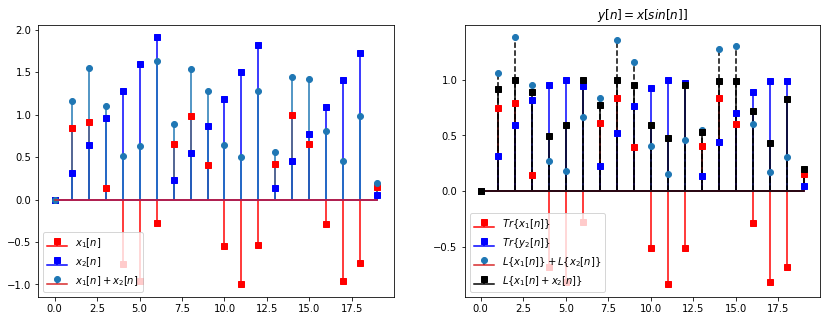

In [9]:
#Adaptado de: 
#https://dspillustrations.com/pages/posts/misc/linearity-causality-and-time-invariance-of-a-system.html

import numpy as np
from matplotlib import pyplot as plt

n = np.arange(20)
x1 = lambda n: np.sin(n)
x2 = lambda n: (n % (2*np.pi))/np.pi

def pruebaLinealidad(s, titleStr):
    plt.figure(figsize=(14,5))
    x1plusx2 = lambda n: x1(n)+x2(n)
    plt.subplot(121)
    plt.stem(n, x1(n), label=r'$x_1[n]$',use_line_collection=True,linefmt='r-', markerfmt='rs', basefmt='r-')
    plt.stem(n, x2(n), label=r'$x_2[n]$',use_line_collection=True,linefmt='b-', markerfmt='bs', basefmt='b-')
    plt.stem(n, x1plusx2(n), label=r'$x_1[n]+x_2[n]$',use_line_collection=True)
    plt.legend()
    
    plt.subplot(122)
    plt.stem(n, s(x1)(n), label=r'$Tr\{x_1[n]\}$',use_line_collection=True,linefmt='r-', markerfmt='rs', basefmt='r-')
    plt.stem(n, s(x2)(n), label=r'$Tr\{y_2[n]\}$',use_line_collection=True,linefmt='b-', markerfmt='bs', basefmt='b-')
    plt.stem(n, s(x1)(n)+s(x2)(n), 'k--', label=r'$L\{x_1[n]\}+L\{x_2[n]\}$',use_line_collection=True)
    plt.stem(n, s(x1plusx2)(n), label=r'$L\{x_1[n]+x_2[n]\}$',use_line_collection=True,linefmt='k+', markerfmt='ks', basefmt='k-')
    plt.legend()
    plt.title(titleStr)
    
def sistema(x):
    return lambda n: np.sin(x(n))

pruebaLinealidad(sistema, '$y[n]=x[sin[n]]$')

***

## Prueba de invariancia

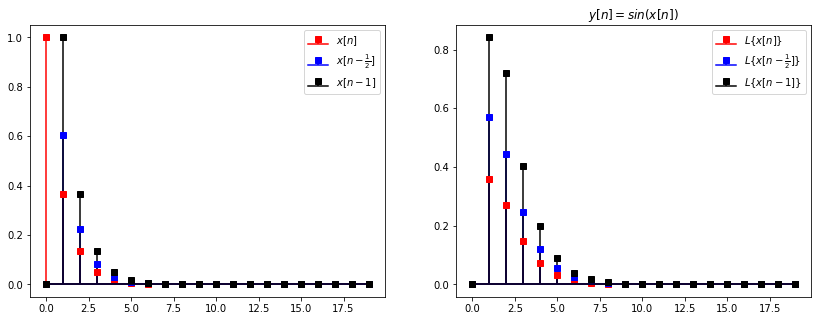

In [10]:
#Adaptado de: 
#https://dspillustrations.com/pages/posts/misc/linearity-causality-and-time-invariance-of-a-system.html

import numpy as np
from matplotlib import pyplot as plt

n = np.arange(20)
x = lambda n: np.exp(-n)*(n>=0).astype(float)

def pruebaInvariancia(s,titleStr):
    
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.stem(n, x(n), label='$x[n]$',use_line_collection=True,linefmt='r-', markerfmt='rs', basefmt='r-')
    plt.stem(n, x(n-0.5), label=r'$x[n-\frac{1}{2}]$',use_line_collection=True,linefmt='b-', markerfmt='bs', basefmt='b-')
    plt.stem(n, x(n-1), label=r'$x[n-1]$',use_line_collection=True,linefmt='k-', markerfmt='ks', basefmt='k-')
    plt.legend()
    
    plt.subplot(122)
    y1 = s(x)
    y2 = s(lambda n: x(n-0.5))
    y3 = s(lambda n: x(n-1))
    plt.stem(n, y1(n), label=r'$L\{x[n]\}$',use_line_collection=True,linefmt='r-', markerfmt='rs', basefmt='r-')
    plt.stem(n, y2(n), label=r'$L\{x[n-\frac{1}{2}]\}$',use_line_collection=True,linefmt='b-', markerfmt='bs', basefmt='b-')
    plt.stem(n, y3(n), label=r'$L\{x[n-1]\}$',use_line_collection=True,linefmt='k-', markerfmt='ks', basefmt='k-')
    plt.legend()
    plt.title(titleStr)
    
    
def sistema(x):
    return lambda n: n*np.sin(x(n))

pruebaInvariancia(sistema, '$y[n]=sin(x[n])$')

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>